In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

Text(0, 0.5, 'Precipitation')

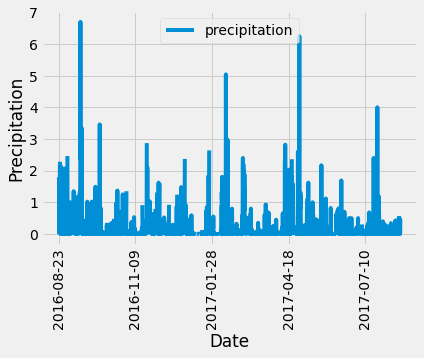

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) -dt.timedelta(days = 365)
 
# Perform a query to retrieve the data and precipitation scores
previous_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
previous_year_prcp_df = pd.DataFrame(previous_year_prcp, columns= ['date', 'precipitation'])
# previous_year_prcp_df.head(10)
# Sort the dataframe by date
previous_year_prcp_df = previous_year_prcp_df.sort_values('date')
# previous_year_prcp_df.head(21)
# Use Pandas Plotting with Matplotlib to plot the data
previous_year_prcp_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation')


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
previous_year_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs).filter(Measurement.station == 'USC00519281')).first()
max_temp = session.query(func.max(Measurement.tobs).filter(Measurement.station == 'USC00519281')).first()
avg_temp = session.query(func.avg(Measurement.tobs).filter(Measurement.station == 'USC00519281')).first()
min_temp, max_temp, avg_temp

((54.0,), (85.0,), (71.66378066378067,))

array([[<AxesSubplot:title={'center':'temp'}>]], dtype=object)

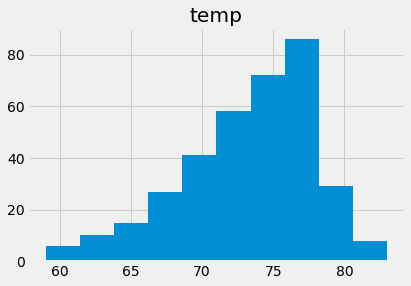

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= previous_year, Measurement.station == 'USC00519281').all()
last_year_temps_df = pd.DataFrame(last_year_temps, columns= ['date', 'temp'])
last_year_temps_df.hist(column='temp')

# Close session

In [22]:
# Close Session
session.close()